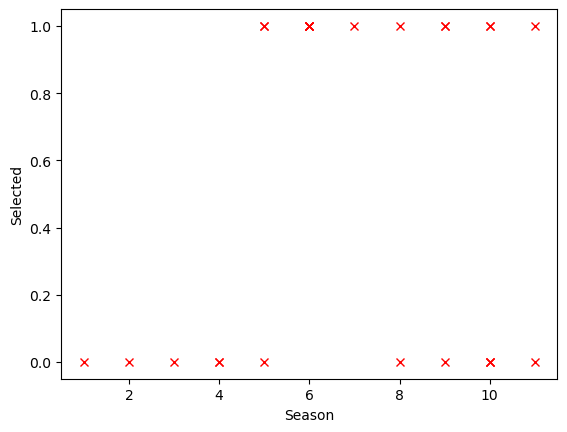

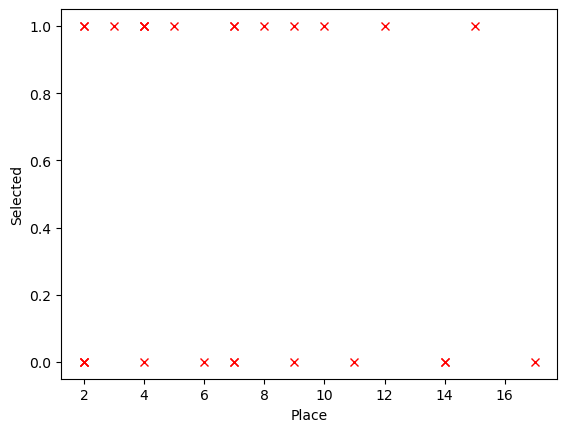

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from sympy import *
%matplotlib inline

x_train = {"Cate Meade": [8, 4], "Willie Mike": [5, 7], "Jamie Vitolo": [5, 6], "Tommy Walton": [6, 7], 
           "Sarah Faherty": [10, 2], "Brandi Mudd": [7, 2], "Malcolm Green": [4, 17], "Adrien Nieto": [2, 2], 
          "Natasha Crnjac": [4, 2], "Sam Daily": [9, 4], "Amanda Saab": [6, 12], "Michael Silverstein": [10, 15],
          "Alejandro Valdivia": [11, 4], "Julia Danno": [9, 7], "Fred Chang": [10, 10], "Shelly Flash": [6, 9],
          "Stephen Lee": [6, 3], "Christian Green": [5, 5], "Derrick Fox": [6, 2], "Wuta Onda": [10, 11],
          "Shanika Patterson": [9, 8], "Felix Fang": [3, 7], "Lexi Rogers": [11, 9], "Brien O Brien": [8, 14],
          "Kenturah King": [10, 14], "Sheetal Bhagat":[1, 4]}
f_x_train = []
for i in x_train.values():
    f_x_train.append(i)
f_train = [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1]
y_train = [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
fs_x_train = f_x_train
f_x_train = np.array(f_x_train)
m, n = f_x_train.shape

x_plot = []
for i in range(n):
    for j in range(m):
        x_plot.append(fs_x_train[j][i])
    plt.plot(x_plot, y_train, 'x', c='r')
    if i==0:
        plt.xlabel("Season")
        plt.ylabel("Selected")
    else:
        plt.xlabel("Place")
        plt.ylabel("Selected")
    plt.show()
    x_plot = []
    

In [3]:
def sigmoid(z):
    z = 1/(1+np.e**-z)
    return z

#calculate overall error 
#w1*x1 + w2*x2 b = y_i,  where x1 is the season, x2 is place, and y_i is overall probability
#convert to sigmoid
#compute overall cost through equation -(1-y)*log(1-y_i) - y*log(y_i)

def compute_cost(w, x, y, b):
    y_i = np.dot(x, w)+b
    y_i = sigmoid(y_i)
    total_cost = 0
    for i in range(len(y_i)):
        if (y[i] == 1 and y_i[i] >= 0.99):
                total_cost = total_cost
        elif y[i] == 1:
            total_cost -= y[i]*np.log(y_i[i])
        elif (y[i] == 0 and y_i[i] < 0.01):
                total_cost = total_cost
        else:
            total_cost -= (1-y[i])*np.log(1-y_i[i]) 
    return total_cost

compute_cost([1, 1], f_x_train, y_train, 10)


291.9663046408037

In [4]:
def gradient(w, x, y, b, alpha, lamb):
    x = np.array(x)
    m, n = x.shape
    y_i = 0
    fw = w
    fb = b
    dj_dw = np.zeros(len(w))
    dj_db = 0
    for j in range(m):
        y_i = 0
        for i in range(n):
            y_i += x[j][i]*w[i]
        y_i += b
        y_i = sigmoid(y_i)
        dj_db = (1/m)*(y_i-y[j])  
        for i in range(n):    
            dj_dw[i] = (1/m)*(y_i-y[j])*x[j][i]
        fb = (1-alpha*lamb/m)*fb
        fb -= alpha*dj_db
        for i in range(n): 
            fw[i] = (1-alpha*lamb/m)*fw[i]
            fw[i] -= alpha*dj_dw[i]
        cost = compute_cost(fw, fs_x_train, y_train, fb)
        print("Iteration {}:    {}      {}       {}      {}".format(j+1, fw, fb, y_i, cost))
    return fw, fb

Iteration 1:    [0.988462011090354, 0.9884617747759463]      5.9078601944300835e-08       0.9999938558253978      170.04428434716735
Iteration 2:    [0.9770570194519838, 0.9770569215678111]      1.2624869097869643e-07       0.9999929434164181      168.08413220763393
Iteration 3:    [0.917707394992184, 0.9080921203134503]      -0.009615053132018525       0.9999785040953592      156.85765957599145
Iteration 4:    [0.9071188700741998, 0.8976146086329775]      -0.009504042450815337       0.9999929529132907      155.05026644475703
Iteration 5:    [0.8005001031369247, 0.8680271148460825]      -0.019009581496947824       0.9999809117387569      143.93032001240095
Iteration 6:    [0.7913072406635365, 0.8580238965608584]      -0.018784000575098502       0.999351081924008      142.2773954592382
Iteration 7:    [0.7437152347914084, 0.6846620855611505]      -0.02818264653458074       0.9999999804762706      122.0740768724711
Iteration 8:    [0.7169480053452408, 0.6585762386061011]      -0.03695041

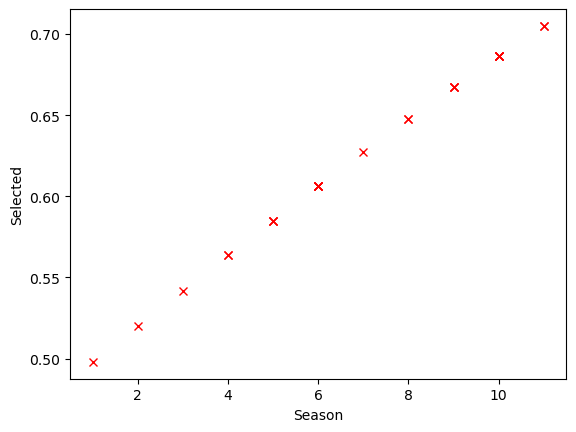

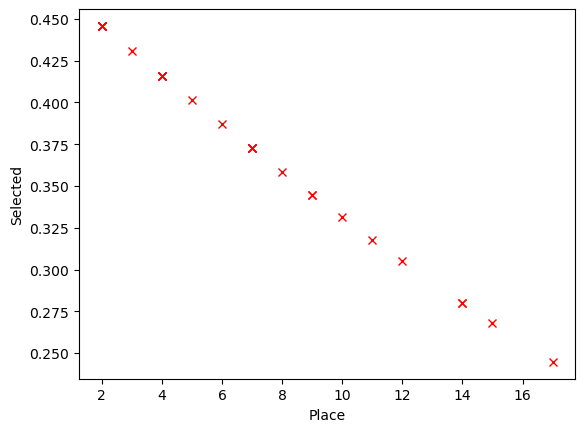

In [5]:
plots = []
fw, fb = gradient([1, 1], fs_x_train, y_train, 0, 0.25, 1.2)
for i, j in fs_x_train:
    plots.append(1/(1+np.e**-(fw[0]*np.transpose(i)+fb)))
x_plot = []
for i in range(1):
    for j in range(m):
        x_plot.append(fs_x_train[j][i])
    plt.xlabel("Season")
    plt.ylabel("Selected")
    plt.plot(x_plot, plots, 'x', c='r')
    plt.show()
x_plot = []  
plots = []
for i, j in fs_x_train:
    plots.append(1/(1+np.e**-(fw[1]*np.transpose(j)+fb)))
i = 1
for j in range(m):
    x_plot.append(fs_x_train[j][i])
plt.xlabel("Place")
plt.ylabel("Selected")
plt.plot(x_plot, plots, 'x', c='r')
plt.show()